In [181]:
import os 
import numpy as np 
import scipy.linalg as LA
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

In [182]:
dats = [fn for fn in os.listdir('../Synthetic/SaveData/LK_PRE_ST_FULL/') if fn.endswith('.dat') and '500' in fn and len(fn)==26]
# Sort the list based on MB offset
dats.sort(key=lambda i: float(i.split('_')[-2]))

MB_PRE = []
for i, dat in enumerate(dats): 
    dat = np.loadtxt('../Synthetic/SaveData/LK_PRE_ST_FULL/{}'.format(dat))
    dat = dat.reshape(-1,101,11)
    #dat[:,:,7][dat[:,:,7] < dat[:,:,8]+10] = dat[:,:,8][dat[:,:,7] < dat[:,:,8]+10]
    
    MB_PRE.append(dat)

    
del_bd = np.linspace(0,3.0,len(MB_PRE))

In [90]:
#messed_up = MB_PRE.pop(22)

Set up the color bar!!

In [91]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

############################################################
# For Seting up the colorbar: 
#    - http://csc.ucdavis.edu/~jmahoney/matplotlib-tips.html
############################################################

colormap = cm.plasma
normalize = mcolors.Normalize(vmin=np.min(del_bd), vmax=np.max(del_bd))

# Colorbar setup
s_map = cm.ScalarMappable(norm=normalize, cmap=colormap)
s_map.set_array(del_bd)

# If color parameters is a linspace, we can set boundaries in this way
halfdist = (del_bd[1] - del_bd[0])/2.0
boundaries = np.linspace(del_bd[0] - halfdist, del_bd[-1] + halfdist, len(del_bd) + 1)

# Convergence Figures

In [92]:
PuBu = plt.cm.viridis(np.linspace(0,1,len(del_bd)))
plasma = plt.cm.plasma(np.linspace(0,1,len(del_bd)))

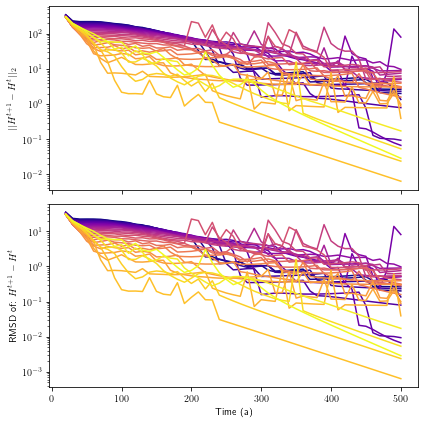

In [93]:
fig, ax = plt.subplots(2,1,sharex=True,figsize=(6.0,6.0))

for i in range(len(MB_PRE)):
    dat = MB_PRE[i]
    ax[0].plot((dat[1:,0,0]+4)*2,LA.norm(dat[1:,:,7] - dat[:-1,:,7],axis=1,ord=2),
               color=plasma[i],
               label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]))
    
    ax[0].set_ylabel(r'$||H^{t+1} - H^{t}||_2$')
    ax[0].set_yscale('log')
    #ax[0].grid( which='both')
    
    ax[1].plot((dat[1:,0,0]+4)*2, 
               np.sqrt(np.mean((dat[1:,:,7] - dat[:-1,:,7])**2 ,axis=1)),
               color=plasma[i],
               label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]))
    
    ax[1].set_ylabel('RMSD of: $H^{t+1} - H^{t}$')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('Time (a)')

    #ax[1].grid( which='both')

#ax[0].legend(title='(m a$^{-1}$)',fontsize='small');

fig.tight_layout()
fig.savefig('../plots/LK_PRE_MB_converge.png',dpi=300,bbox_inches='tight',facecolor="w")

In [94]:
np.argmax([np.mean(np.sqrt(np.mean((dat[1:,:,7] - dat[:-1,:,7])**2 ,axis=1))) for dat in MB_PRE])

7

In [95]:
(dat[:,:,7 ] - dat[:,:,8]) > 10.

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

# Length and Area timeseries

In [96]:
plasma = plt.cm.plasma(np.linspace(0,1,len(del_bd)))

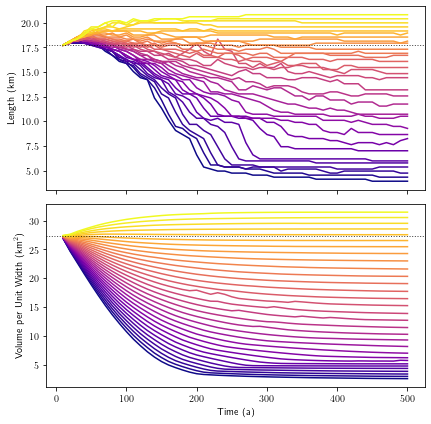

In [190]:
fig, ax = plt.subplots(2,1,sharex=True,figsize=(6.0,6.0))

for i in range(len(MB_PRE)):
    dat = MB_PRE[i]
    L = np.count_nonzero((dat[:,:,7 ] - dat[:,:,8]) > 10.,axis=1)*206/1000.0
    ax[0].plot((dat[:,0,0]+4)*2, L,label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]),color=plasma[i])
    ax[0].set_ylabel('Length (km)')

    integrated = np.trapz((dat[:,:,7] - dat[:,:,8])/1000.0, axis = 1)
    ax[1].plot((dat[:,0,0]+4)*2,integrated,label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]),color=plasma[i])
    ax[1].set_ylabel('Volume per Unit Width (km$^2$)')
    ax[1].set_xlabel('Time (a)')
    
    
ax[0].axhline( np.count_nonzero((dat[0,:,7 ] - dat[0,:,8]) > 10.)*206/1000.0, linestyle=':',color='k',alpha=0.75,lw=1.0)
ax[1].axhline(np.trapz((dat[0,:,7] - dat[0,:,8])/1000.0), linestyle=':',color='k',alpha=0.75,lw=1.0)

#ax[0].legend(title='(m a$^{-1}$)',fontsize='small');

fig.tight_layout()
fig.savefig('../plots/LK_PRE_MB_length.png',dpi=300,bbox_inches='tight')

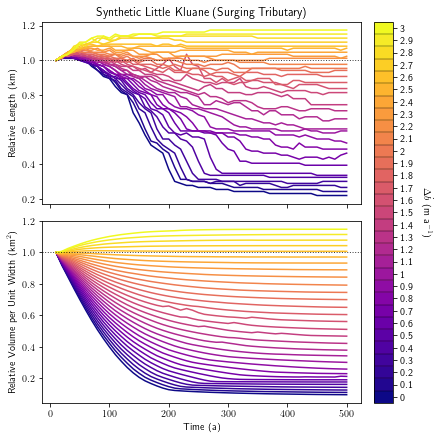

In [191]:
fig, ax = plt.subplots(2,1,sharex=True,constrained_layout=True, figsize=(6.0,6.0))

for i in range(len(MB_PRE)):
    dat = MB_PRE[i]
    L = np.count_nonzero((dat[:,:,7 ] - dat[:,:,8]) > 10., axis=1)/np.count_nonzero((dat[0,:,7 ] - dat[0,:,8]) > 10.)#*206/1000.0
    ax[0].plot((dat[:,0,0]+4)*2, L,label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]),color=plasma[i])
    ax[0].set_ylabel('Relative Length (km)')

    integrated = np.trapz((dat[:,:,7] - dat[:,:,8])/np.trapz(dat[0,:,7] - dat[0,:,8]), axis = 1)
    ax[1].plot((dat[:,0,0]+4)*2,integrated,label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]),color=plasma[i])
    ax[1].set_ylabel('Relative Volume per Unit Width (km$^2$)')
    ax[1].set_xlabel('Time (a)')
    
    
ax[0].axhline(1.0, linestyle=':',color='k',alpha=0.75,lw=1.0)
ax[1].axhline(1.0, linestyle=':',color='k',alpha=0.75,lw=1.0)

ax[0].set_title('Synthetic Little Kluane (Surging Tributary)')
#ax[0].legend(title='(m a$^{-1}$)',fontsize='small');
cbar = fig.colorbar(s_map, spacing='proportional', ticks=del_bd, ax=ax, boundaries=boundaries, drawedges=True, format='%2.2g') 
cbar.set_label('$\Delta \dot b$ (m a$^{-1}$)', rotation=270, labelpad=20)


#fig.tight_layout()
fig.savefig('../plots/LK_PRE_MB_length_norm.png',dpi=300,bbox_inches='tight',facecolor="w")

In [125]:
RA = np.trapz((np.stack(MB_PRE)[:,-1,:,7] - np.stack(MB_PRE)[:,-1,:,8])/np.trapz(np.stack(MB_PRE)[0,0,:,7] - np.stack(MB_PRE)[0,0,:,8]), axis = 1)

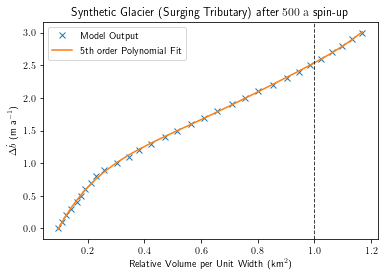

In [192]:
plt.plot(RA, del_bd, 'x',label='Model Output')

plt.plot(RA, np.polyval(np.polyfit(RA, del_bd, 5), RA), label='5th order Polynomial Fit')
plt.axvline(1.0, ls='--',c='k',alpha=0.75,lw=1)

plt.title('Synthetic Glacier (Surging Tributary) after $500 \; \\rm{a}$ spin-up')
plt.ylabel('$\Delta \dot b$ (m a$^{-1}$)')
plt.xlabel('Relative Volume per Unit Width (km$^2$)')

plt.legend()

plt.savefig('../plots/offset_v_area_500a.png',dpi=300,bbox_inches='tight',facecolor="w")

In [135]:
print('del bdot {}'.format(np.polyval(np.polyfit(RA, del_bd, 5), 1.0)))
print('del bdot {}'.format(np.polyval(np.polyfit(RA, del_bd, 1), 1.0)))

del bdot 2.536681716268293
del bdot 2.60238034787005


In [119]:
np.count_nonzero((np.stack(MB_PRE)[:,-1,:,7] - np.stack(MB_PRE)[:,-1,:,8]) > 10., axis=0) / \
np.count_nonzero((np.stack(MB_PRE)[0,0,:,7 ] - np.stack(MB_PRE)[0,0,:,8]) > 10.)

array([0.36046512, 0.36046512, 0.36046512, 0.36046512, 0.36046512,
       0.36046512, 0.36046512, 0.36046512, 0.36046512, 0.36046512,
       0.36046512, 0.36046512, 0.36046512, 0.36046512, 0.36046512,
       0.36046512, 0.36046512, 0.34883721, 0.34883721, 0.3372093 ,
       0.3372093 , 0.3255814 , 0.3255814 , 0.3372093 , 0.31395349,
       0.3255814 , 0.30232558, 0.30232558, 0.29069767, 0.29069767,
       0.29069767, 0.27906977, 0.27906977, 0.27906977, 0.27906977,
       0.27906977, 0.27906977, 0.26744186, 0.27906977, 0.25581395,
       0.26744186, 0.25581395, 0.25581395, 0.24418605, 0.24418605,
       0.24418605, 0.24418605, 0.24418605, 0.23255814, 0.29069767,
       0.23255814, 0.22093023, 0.22093023, 0.22093023, 0.22093023,
       0.20930233, 0.22093023, 0.20930233, 0.20930233, 0.19767442,
       0.20930233, 0.25581395, 0.19767442, 0.18604651, 0.18604651,
       0.18604651, 0.18604651, 0.1744186 , 0.18604651, 0.1744186 ,
       0.1627907 , 0.1627907 , 0.1627907 , 0.15116279, 0.15116

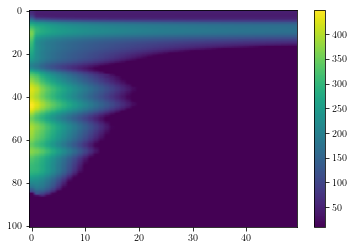

In [14]:
fig, ax = plt.subplots(1,1)

im = ax.imshow((MB_PRE[0][:,:,7] - MB_PRE[0][:,:,8]).T,aspect='auto')
fig.colorbar(im)

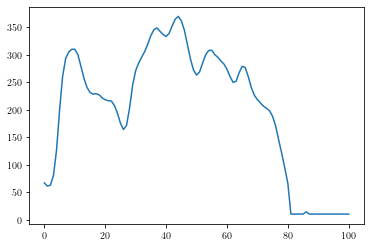

In [15]:
plt.plot((MB_PRE[20][-1,:,7] - MB_PRE[20][-1,:,8]))

In [16]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [20]:
fig, ax = plt.subplots(1,1,figsize=(8,4))

ax.set_xlim(dat[0,:,4].min(),dat[0,:,4].max())
ax.set_ylim(dat[0,:,8].min()-25, dat[0,:,8].max()+200)
ax.set_ylabel('m a.s.l.')
ax.set_xlabel('x-coord (m)')


ax.plot(dat[0,:,4],dat[0,:,7])
ax.plot(dat[0,:,4],dat[0,:,8])
line1, = ax.plot([], [], lw=2, color='lightblue',label='Upwind')

line = [line1]

def animate(i):  
    line[0].set_data(dat[0,:,4], dat[i,:,7])
    return line

anim = animation.FuncAnimation(fig, animate, 
                               frames=range(0,dat.shape[0]), interval=10, blit=True)
plt.close()
anim

In [21]:
np.max(dat[:,:,7] - dat[:,:,8])

461.5517551199998

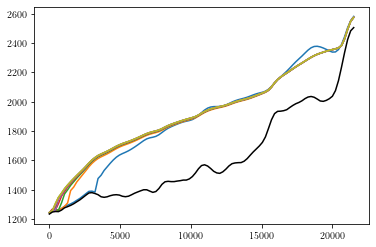

In [22]:
fig, ax = plt.subplots()

for t in range(0,dat.shape[0],5):
    ax.plot(dat[t,:,4], dat[t,:,7])
    
ax.plot(dat[t,:,4], dat[t,:,8],'k')

fig.savefig('../plots/test.png',dpi=300)

In [23]:
(dat[:,:,7 ] - dat[:,:,8]) > 10 

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True, False, False],
       [ True,  True,  True, ...,  True, False, False],
       [ True,  True,  True, ...,  True, False, False]])

Text(0.5, 0, 'Time (a)')

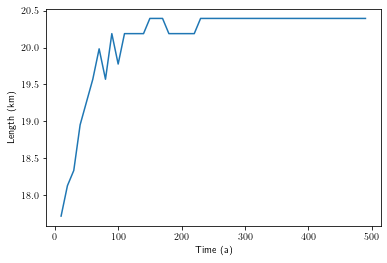

In [25]:
L = np.count_nonzero((dat[:,:,7 ] - dat[:,:,8]) > 10 ,axis=1)*206/1000.0

plt.plot((dat[:,0,0]+4)*2, L)
plt.ylabel('Length (km)')
plt.xlabel('Time (a)')

In [26]:
dat.shape

(45, 101, 11)

(0.2, 1.2)

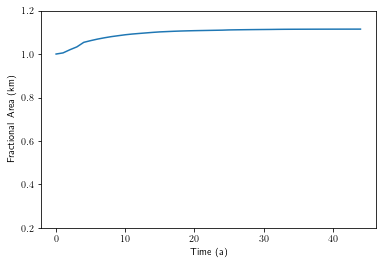

In [27]:
    
plt.plot(np.trapz((dat[:,:,7] - dat[:,:,8])/np.trapz(dat[0,:,7] - dat[0,:,8]), axis = 1))
plt.ylabel('Fractional Area (km)')
plt.xlabel('Time (a)')

plt.ylim(0.2, 1.2)

In [196]:
! ls ../*.h5

../LK_PRE_500a_MB_2.6_OFF.h5 ../lk_pre_500a_mb_2.0_off.h5
../LK_ST_500a_mb_2.6_off.h5


In [201]:
import h5py

with h5py.File('../LK_PRE_500a_MB_2.6_OFF.h5', 'r') as f:
    ELMER_MB = f['b_dot'][:]
    x = f['x'][:]


In [202]:
with h5py.File('../LK_ST_500a_mb_2.6_off.h5', 'r') as f:
    manual_MB = f['b_dot'][:]

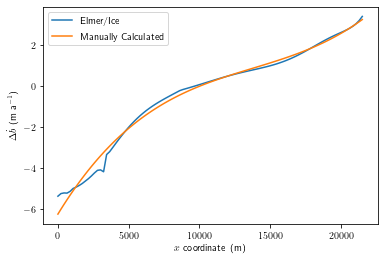

In [208]:
plt.plot(x,ELMER_MB, label='Elmer/Ice') 

plt.plot(x,manual_MB, label='Manually Calculated') 

plt.ylabel('$\dot b$ (m a$^{-1}$)')
plt.xlabel('$x$ coordinate (m)')
plt.title('Surface Mass Balance Forcing')
plt.legend()

plt.savefig('../plots/elmer_vs_manual_SMB.png',dpi=300,bbox_inches='tight')

In [167]:
import h5py

with h5py.File('myfile.h5', 'w') as f:
    dset = f.create_dataset(
        "grids", 
        (10,10,5), 
        maxshape=(10,10,None), 
        dtype='f4', 
        chunks=True,
        compression='gzip')

In [168]:
!h5ls -r myfile.h5

/                        Group
/grids                   Dataset {10, 10, 5/Inf}


In [169]:
mygrids = [np.random.randn(10,10) for _ in range(5)]

print(np.shape(mygrids))  # 5 grids of 10 by 10



(5, 10, 10)


In [170]:
with h5py.File('myfile.h5', 'a') as f:
    grids = f['grids']
    
    for k,g in enumerate(mygrids):
        grids[:,:,k] = g


In [173]:
with h5py.File('myfile.h5', 'r') as f:
    mygrids = f['grids'][:,:,[0,2,4]]  # 3 grids out of 5
    
print(np.shape(mygrids))

(10, 10, 3)


In [174]:
import h5py
import numpy as np

## Data set with shape (5, 5) and list containing column names as string
data = np.random.rand(5, 5)
col_names = ["a", "b", "c", "d", "e"]
## Create file pointer
with h5py.File("data_set_2.HDF5", "w") as fp :
    ds_dt = np.dtype( { 'names':col_names,
                        'formats':[ (float), (float), (float), (float), (float)] } )
    rec_arr = np.rec.array(data,dtype=ds_dt)        
    ## Store data
    ##fp["sub"] = data
    ds1 = fp.create_dataset('sub', data=rec_arr )

In [180]:
rec_arr.dtype

dtype((numpy.record, [('a', '<f8'), ('b', '<f8'), ('c', '<f8'), ('d', '<f8'), ('e', '<f8')]))